In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad

/Users/zkw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/zkw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


Text(0, 0.5, 'log(rho_h)')

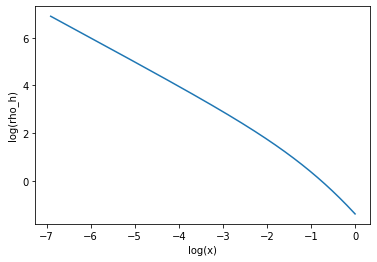

In [10]:
#NFW profile

r_s=1
rho_s=1
r=np.linspace(0,1,1000)
x=r/r_s

def rho_h(x):
    rho_h=rho_s/(x*(1+x)**2)
    rho_h1=np.log(rho_h)
    return rho_h1

x1=np.log(x)

plt.plot(x1,rho_h(x))
plt.xlabel('log(x)')
plt.ylabel('log(rho_h)')

I am wondering is this the dark matter halo density profile that I am going to study?
But I don't understand how this profile linked to the dark matter decay mode.
And in the paper of Klypin, I saw the constrain he made, but I don't know how thoes constrains applied to the density model. If I want to solve the velocity profile, should I just solve the conservation of angular momentum plus the virial theroem?

As for the dark matter column density. Is it the integral of the mass desity along the radial direction? I don't know how it is related to the longitude and latitude.

/Users/zkw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/zkw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
/Users/zkw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
/Users/zkw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges. 

Text(0, 0.5, 'M_DM [M_sun]')

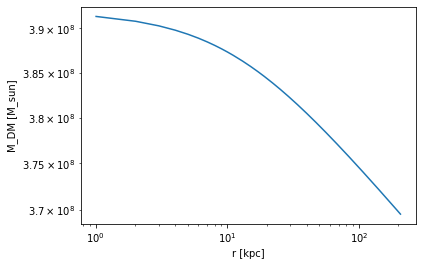

In [49]:
M_200=0.82*10**12 #M_sun
R_200=207 #kpc
R_s=14.4  #kpc
r=np.linspace(0,R_200,100)


# NFW profile without correction
def rho(c,x):
    rho_r=M_200/(4*np.pi*R_200**3)*c**3*R_s**2/(np.log(1+c)-c/(1+c))/(x*(x+R_200/c)**2)
    return rho_r


c1=9
rho_r=rho(c1,r)

# DMO mass within radius r
def integrand(x,a,b):
    return a/(x*(x+b)**2)

a=M_200/(4*np.pi*R_200**3)*c1**3*R_s**2/(np.log(1+c1)-c1/(1+c1))
b=R_200/c1

M_DM=np.array([])

#DM mass within radius r with correction
for r1 in range (0,R_200):

    M_DMO=quad(integrand,0,r1,args=(a,b))

    chi_tot=M_DMO[0]/M_200
    ita_DM=1.023*chi_tot**(-0.54)

    M_DM1=M_DMO[0]*(0.45+0.38*(ita_DM+1.16)**0.53)
    M_DM=np.append(M_DM,M_DM1)

r2=np.linspace(0,R_200,207)
plt.loglog(r2,M_DM)
plt.xlabel('r [kpc]')
plt.ylabel('M_DM [M_sun]')


I am not sure if I understand it correctly. 
The article mainly made a correction to the NFW profile, using the fraction of baryons in the universe took the baryonic matter into consideration while fitting the DM profile, and the NFW profile can be written as only one parameter dependence, but I am not sure about the physical meaning of the concentration.

And as for uncertainty, they analysed  it using the Bayesian theorem and showed that there are systematic biases regarding different models?
